In [1]:
%matplotlib inline
import matplotlib.pyplot as plt
import numpy as np
import sklearn
import pandas as pd

In [2]:
pd.set_option('display.max_columns', None)
df = pd.read_csv("cumulative.csv")
df.head(5)

,rowid,kepid,kepoi_name,kepler_name,koi_disposition,koi_pdisposition,koi_score,koi_fpflag_nt,koi_fpflag_ss,koi_fpflag_co,koi_fpflag_ec,koi_period,koi_period_err1,koi_period_err2,koi_time0bk,koi_time0bk_err1,koi_time0bk_err2,koi_impact,koi_impact_err1,koi_impact_err2,koi_duration,koi_duration_err1,koi_duration_err2,koi_depth,koi_depth_err1,koi_depth_err2,koi_prad,koi_prad_err1,koi_prad_err2,koi_teq,koi_teq_err1,koi_teq_err2,koi_insol,koi_insol_err1,koi_insol_err2,koi_model_snr,koi_tce_plnt_num,koi_tce_delivname,koi_steff,koi_steff_err1,koi_steff_err2,koi_slogg,koi_slogg_err1,koi_slogg_err2,koi_srad,koi_srad_err1,koi_srad_err2,ra,dec,koi_kepmag
0,1,10797460,K00752.01,Kepler-227 b,CONFIRMED,CANDIDATE,1.000,0,0,0,0,9.488036,2.775000e-05,-2.775000e-05,170.538750,0.002160,-0.002160,0.146,0.318,-0.146,2.95750,0.08190,-0.08190,615.8,19.5,-19.5,2.26,0.26,-0.15,793.0,NaN,NaN,93.59,29.45,-16.65,35.8,1.0,q1_q17_dr25_tce,5455.0,81.0,-81.0,4.467,0.064,-0.096,0.927,0.105,-0.061,291.93423,48.141651,15.347
1,2,10797460,K00752.02,Kepler-227 c,CONFIRMED,CANDIDATE,0.969,0,0,0,0,54.418383,2.479000e-04,-2.479000e-04,162.513840,0.003520,-0.003520,0.586,0.059,-0.443,4.50700,0.11600,-0.11600,874.8,35.5,-35.5,2.83,0.32,-0.19,443.0,NaN,NaN,9.11,2.87,-1.62,25.8,2.0,q1_q17_dr25_tce,5455.0,81.0,-81.0,4.467,0.064,-0.096,0.927,0.105,-0.061,291.93423,48.141651,15.347
2,3,10811496,K00753.01,NaN,FALSE POSITIVE,FALSE POSITIVE,0.000,0,1,0,0,19.899140,1.494000e-05,-1.494000e-05,175.850252,0.000581,-0.000581,0.969,5.126,-0.077,1.78220,0.03410,-0.03410,10829.0,171.0,-171.0,14.60,3.92,-1.31,638.0,NaN,NaN,39.30,31.04,-10.49,76.3,1.0,q1_q17_dr25_tce,5853.0,158.0,-176.0,4.544,0.044,-0.176,0.868,0.233,-0.078,297.00482,48.134129,15.436
3,4,10848459,K00754.01,NaN,FALSE POSITIVE,FALSE POSITIVE,0.000,0,1,0,0,1.736952,2.630000e-07,-2.630000e-07,170.307565,0.000115,-0.000115,1.276,0.115,-0.092,2.40641,0.00537,-0.00537,8079.2,12.8,-12.8,33.46,8.50,-2.83,1395.0,NaN,NaN,891.96,668.95,-230.35,505.6,1.0,q1_q17_dr25_tce,5805.0,157.0,-174.0,4.564,0.053,-0.168,0.791,0.201,-0.067,285.53461,48.285210,15.597
4,5,10854555,K00755.01,Kepler-664 b,CONFIRMED,CANDIDATE,1.000,0,0,0,0,2.525592,3.761000e-06,-3.761000e-06,171.595550,0.001130,-0.001130,0.701,0.235,-0.478,1.65450,0.04200,-0.04200,603.3,16.9,-16.9,2.75,0.88,-0.35,1406.0,NaN,NaN,926.16,874.33,-314.24,40.9,1.0,q1_q17_dr25_tce,6031.0,169.0,-211.0,4.438,0.070,-0.210,1.046,0.334,-0.133,288.75488,48.226200,15.509


In [3]:
data = df.dropna(axis='columns', how='any')
data = data.drop(['rowid', 'kepid', 'kepoi_name','koi_pdisposition'], axis=1)
target = df["koi_disposition"]
data = data.drop("koi_disposition", axis=1)

In [5]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(data, target, random_state=42)

In [6]:
from sklearn.preprocessing import LabelEncoder
label_encoder = LabelEncoder()
label_encoder.fit(y_train)
encoded_y_train = label_encoder.transform(y_train)
encoded_y_test = label_encoder.transform(y_test)

In [7]:
from sklearn.preprocessing import StandardScaler

x_scaler = StandardScaler().fit(X_train)
scaled_x_train = x_scaler.transform(X_train)
scaled_x_test = x_scaler.transform(X_test)

k: 1, Train/Test Score: 1.000/0.776
k: 3, Train/Test Score: 0.885/0.790
k: 5, Train/Test Score: 0.860/0.783
k: 7, Train/Test Score: 0.852/0.783
k: 9, Train/Test Score: 0.843/0.785
k: 11, Train/Test Score: 0.831/0.788
k: 13, Train/Test Score: 0.831/0.785
k: 15, Train/Test Score: 0.824/0.790
k: 17, Train/Test Score: 0.822/0.785
k: 19, Train/Test Score: 0.821/0.791


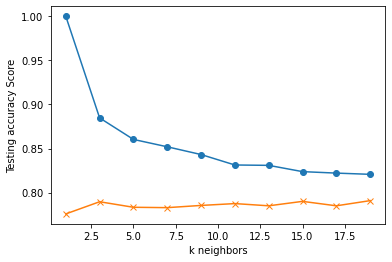

In [8]:
from sklearn.neighbors import KNeighborsClassifier
knn = KNeighborsClassifier()

train_scores = []
test_scores = []
for k in range (1,20,2):
    knn = KNeighborsClassifier(n_neighbors=k)
    knn.fit(scaled_x_train, encoded_y_train)
    train_score = knn.score(scaled_x_train, encoded_y_train)
    train_scores.append(train_score)
    test_score = knn.score(scaled_x_test, encoded_y_test)
    test_scores.append(test_score)
    print(f"k: {k}, Train/Test Score: {train_score:.3f}/{test_score:.3f}")
    

plt.plot(range(1, 20, 2), train_scores, marker='o')
plt.plot(range(1, 20, 2), test_scores, marker="x")
plt.xlabel("k neighbors")
plt.ylabel("Testing accuracy Score")
plt.show()

In [9]:
from sklearn.model_selection import GridSearchCV

k_range = list(range(1, 32,2))
param_grid = dict(n_neighbors=k_range)
grid = GridSearchCV(knn, param_grid, cv=10, scoring='accuracy', return_train_score=False,verbose=3)

In [10]:
grid.fit(scaled_x_train, encoded_y_train)

Fitting 10 folds for each of 16 candidates, totalling 160 fits
[CV 1/10] END ....................n_neighbors=1;, score=0.776 total time=   0.0s
[CV 2/10] END ....................n_neighbors=1;, score=0.770 total time=   0.0s
[CV 3/10] END ....................n_neighbors=1;, score=0.777 total time=   0.0s
[CV 4/10] END ....................n_neighbors=1;, score=0.782 total time=   0.0s
[CV 5/10] END ....................n_neighbors=1;, score=0.774 total time=   0.0s
[CV 6/10] END ....................n_neighbors=1;, score=0.791 total time=   0.0s
[CV 7/10] END ....................n_neighbors=1;, score=0.770 total time=   0.1s
[CV 8/10] END ....................n_neighbors=1;, score=0.770 total time=   0.0s
[CV 9/10] END ....................n_neighbors=1;, score=0.762 total time=   0.0s
[CV 10/10] END ...................n_neighbors=1;, score=0.775 total time=   0.0s
[CV 1/10] END ....................n_neighbors=3;, score=0.794 total time=   0.0s
[CV 2/10] END ....................n_neighbors=

GridSearchCV(cv=10, estimator=KNeighborsClassifier(n_neighbors=19),
             param_grid={'n_neighbors': [1, 3, 5, 7, 9, 11, 13, 15, 17, 19, 21,
                                         23, 25, 27, 29, 31]},
             scoring='accuracy', verbose=3)

In [16]:
print(grid.best_params_)
accuracy = grid.best_score_ *100
print("Accuracy for our training dataset with tuning is : {:.2f}%".format(accuracy) )

{'n_neighbors': 5}
Accuracy for our training dataset with tuning is : 79.67%
